# Import Packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
data=pd.read_json('train.json')  ### Load data into a pandas dataframe

In [3]:
unique_ingredients=[] ### Initialize the list for all ingredients 
for i in range(len(data.id)):
    for k in data.ingredients[i]:
        if k not in unique_ingredients:
            unique_ingredients.append(k) ## Append the ingredient if it is not in the unique_ingredients

In [4]:
N = len(unique_ingredients)
M = len(data.id)
binary_assignment=[] ## Initialize the binary_assignment as a list
for i in range(M):
    assigment=np.zeros(N) ### initialze the ingredients as all 0
    for j in data.ingredients[i]:
        assigment[unique_ingredients.index(j)]=1 ### Assigne 1 if the ingreident is in the dish
    binary_assignment.append(assigment)

In [5]:
binary_assignment=np.reshape(binary_assignment,(M,N)) ## Reshape the assignemt into M by N matrix 

In [46]:
from sklearn import preprocessing
unique_labels=np.unique(data.cuisine)
le = preprocessing.LabelEncoder()
le.fit(data.cuisine)
label=le.transform(data.cuisine)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, labels, test_size=0.2, random_state=0)

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## Logistic Regression

In [41]:
ss = ShuffleSplit(n_splits=10, test_size=0.1, train_size=0.9)
clf = LogisticRegression(C=1,multi_class='multinomial',penalty='l1', solver='saga', tol=0.05)
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.05, verbose=0, warm_start=False)

In [49]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_test = np.sum(y_test_pred == y_test) / len(y_test)
accuracy_train = np.sum(y_train_pred == y_train) / len(y_train)

In [50]:
print('\tAccuracy of test', accuracy_test)
print('\tAccuracy of training',accuracy_train)

	Accuracy of test 0.7757385292269013
	Accuracy of training 0.831170055627141


In [35]:
clf_ovr = LogisticRegression(C=1,multi_class='ovr',penalty='l1', solver='saga', tol=0.05)
clf_ovr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='saga', tol=0.1,
          verbose=0, warm_start=False)

In [47]:
y_test_pred1=clf_ovr.predict(X_test)
y_train_pred1=clf_ovr.predict(X_train)
accuracy_test1 = np.sum(y_test_pred1 == y_test) / len(y_test)
accuracy_train1 = np.sum(y_train_pred1 == y_train) / len(y_train)

In [48]:
print('\tAccuracy of test', accuracy_test1)
print('\tAccuracy of training',accuracy_train1)

	Accuracy of test 0.772972972972973
	Accuracy of training 0.8120305477859141


In [ ]:
svm_classif = OneVsRestClassifier(SVM(kernel='linear'))
svm_classif.fit(X_train, y_train)

In [17]:
X_train.shape

(31819, 6714)

In [8]:
import matplotlib.pyplot as plt

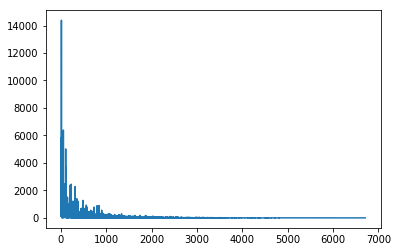

In [14]:
plt.plot(X_train.sum(axis=0))